# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

In [1]:
#student number : C1986330  

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [2]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# add more imports here if you like
from scipy.stats import ttest_ind
from scipy.spatial import distance
import datetime
from scipy import stats
import statsmodels.api as s

In [3]:
# if you use Google Colab:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# change this line your folder where the data is found
basedir = '/Users/auhh9/OneDrive/Desktop/CDS 309'

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [5]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
    return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [6]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


## Question 1a

In [7]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
    
  '''
   funcation to remove specified columns of the original df.
   
  '''
  
  cols_to_drop = ['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped',
  'amenities','neighborhood_overview', 'picture_url','host_url', 'host_about', 'host_location',
  'host_total_listings_count','host_thumbnail_url','host_picture_url', 'host_verifications','bathrooms_text',
  'has_availability', 'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
  'minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count',
  'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']
  df = df.drop(cols_to_drop, axis=1)
  return df

In [8]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [9]:
def drop_cols_na(df, threshold):
    '''
    drop columns according to the amount of NaN values they contain.
    Parameters:
    df: the datafream from step 1.
    threshold : is a fraction between 0 and 1 .
    '''
  # a new variable called thresh to assign the desired threshold. 
    thresh = len(df)*threshold
    df.dropna(thresh= thresh , axis = 1, inplace = True)
    return df

In [10]:
df = drop_cols_na(df,0.5) # we assign threshhold here to 0.5.

## Question 1b

In [11]:
def binary_encoding(df):
    '''Replacing columns with f/t with 0/1'''
    df.replace({'f':   int (0), 't': int (1)}, inplace=True)
    return df

In [12]:
df = binary_encoding(df)

In [13]:
def add_host_days(df):
    
    '''adding a column that represents the number of days,
    (with respect to the current date) that the host has been registered.
    
    '''

  #First we need to define the format of host_since column.
    df['host_since'] = pd.to_datetime(df.host_since)
  
    today = datetime.datetime(2021, 3, 31)
    df['host_days'] = today - df['host_since']
   
   
    return df

In [14]:
def convert_price(df):
    '''
    function to convert the prices into floating point numbers.
    
    '''
    # use string.replace to get rid of string items in price column + regular exp
    df = df.assign(price=df['price'].str.replace(r'$', ''))
    df = df.assign(price=df['price'].str.replace(r',', ''))

    #convert price to float type
    df['price'] = df['price'].astype(float)

    return df

In [15]:
df = add_host_days(df)
df = convert_price(df)

In [16]:
df.head(4)# print four cols to show changes.

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95,4571 days
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,...,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58,4137 days
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14,4149 days
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01,4026 days


## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [17]:
# How many hosts offer 2 or more properties for rent?
df[df['host_listings_count']>=2].count()['host_id']

4172

In [18]:
# What is the highest price for a listing?
df['price'].max()


8000.0

In [19]:
# What is the ID of the listing that has the largest number of bedrooms?
mxbedrooms = df['bedrooms'].max()
(df[df['bedrooms'] == mxbedrooms ] )['id'].item()

46015289

In [20]:
# What is the ID of the listing with the largest advertised price
maxprice = df['price'].max()
( df[df['price'] == maxprice ] )['id'].values[:]

array([  258273, 21946106], dtype=int64)

In [21]:
# There are different room types. How many listings are there for the most common room type?
common = df['room_type'].value_counts() # this will return the common room type which is entir home/apt
common . max()

14433

In [22]:
# How many hosts are there that have been registered for more than 3000 days?
df['host_days'] = df['host_days'].astype('timedelta64[D]') #convert col to just days.
df[df['host_days']>3000].count()['host_id']

2382

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

In [23]:
def price_neighborhood(df):
    #Calculate average nightly prices in different neighborhoods
    avg_prices = df.groupby(['neighbourhood_cleansed'])['price'].mean()
    
    #Store them in a dataframe
    avg_prices_df = pd.DataFrame(avg_prices).reset_index()

    #Visualize the results
    colors = sns.color_palette("Set2")
    sns.barplot(y = 'neighbourhood_cleansed', x = 'price', data = df, 
                 orient='h')
    plt.xlabel('Average Price per Night ($)')
    plt.ylabel('')
    plt.title('Average Prices in Amsterdam Neighborhoods')
    plt.subplots_adjust(left=0.35, right=0.9, top=0.95, bottom=0.07)
    plt.grid(axis = 'x', linestyle = ' ', zorder=0)

    return avg_prices_df

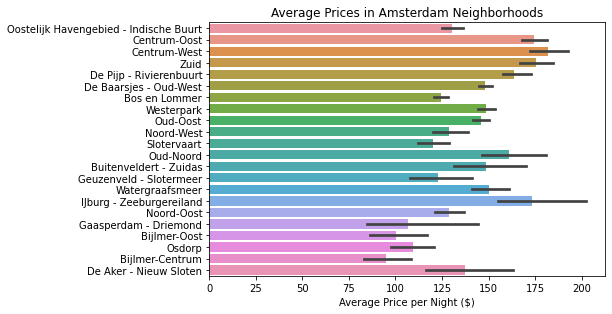

In [24]:
#Average prices for different neighborhoods
plt.rcParams['figure.figsize'] = [10, 4]
all_avg = price_neighborhood(df);

Plot a correlation matrix as instructed in the Coursework proforma:

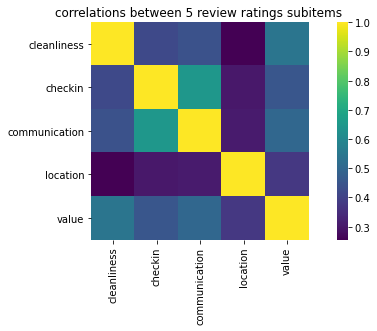

In [25]:
# first part, create a correlation matrix with the 5 subitem that we interested in.
coor_vals = df.loc[:,'review_scores_cleanliness':'review_scores_value'].corr()

x_axis_labels = ['cleanliness','checkin','communication','location','value'] # labels for x-axis
y_axis_labels = ['cleanliness','checkin','communication','location','value'] # labels for y-axis

# create seabvorn heatmap with required labels
pp = sns.heatmap(coor_vals, cmap="viridis",square=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels )
pp.set_title('correlations between 5 review ratings subitems ')

plt.show()

Plot a geographical distribution as instructed in the Coursework proforma:

Text(0.5, 1.0, 'nightly prices for the more expensive listings')

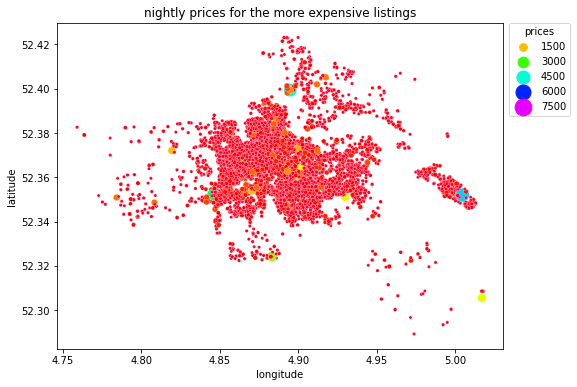

In [26]:
plt.figure(figsize=(8,6)) #figur size.
# include listing with price grater than 150.
dfneww = df[df.price > 150] 

sns.scatterplot(y='latitude',x='longitude',data=dfneww,hue='price',palette='gist_rainbow',size='price',sizes=(10, 300) )

# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.15, 1),borderaxespad=0,title = 'prices')
plt.title("nightly prices for the more expensive listings")

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [27]:
# assinge these virables to new ones short and readable.
overall_rating = df['review_scores_rating']
accuracy = df['review_scores_accuracy']
cleanliness = df['review_scores_cleanliness']
checkin = df['review_scores_checkin']
communication = df['review_scores_communication']
location = df['review_scores_location']
value = df['review_scores_value'] 

# linear regression formula + fit to the model.
mod = sm.OLS.from_formula('overall_rating ~ accuracy + cleanliness + checkin + communication + location + value', df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     7008.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        04:05:03   Log-Likelihood:                -42957.
No. Observations:               15880   AIC:                         8.593e+04
Df Residuals:                   15873   BIC:                         8.598e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3169      0.550     -0.577

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): Entire Home vs private room has the significant difference having p-value 0.0000000 followings by private room vs hotel room with p-value 0.00005m .Then Entire_home vs shared_room with a p-value of 0.00217  and Entire_home vs hotel_room p-value: 0.0029.

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): Our conclusion won't change because  Bonferroni's adjustment is calculated by taking the number of tests and dividing it into the alpha value. Using the 0.01 error rate from our example, four tests would yield an error rate of 0.0025 or (.01/4) while six tests would therefore have an error rate of 0.00166 or (.01/6)


In [28]:
# extract each room type
# and put them in  different dataframes
Entire_home = df[df.room_type == 'Entire home/apt']['price'].dropna()
private_room = df[df.room_type == 'Private room']['price'].dropna()
hotel_room = df[df.room_type == 'Hotel room']['price'].dropna()
shared_room = df[df.room_type == 'Shared room']['price'].dropna()


In [29]:
alpha = 0.01
# it's significant when p-value < 0.01 (alpha)
 
print('Entire_home vs private_room p-value: {:.10f}'.format(ttest_ind(Entire_home, private_room).pvalue))
print('private_room vs hotel_room p-value: {:.10f}'.format(ttest_ind(private_room, hotel_room).pvalue))
print('hotel_room vs shared_room p-value: {:.10f}'.format(ttest_ind(hotel_room, shared_room).pvalue))
print('Entire_home vs shared_room p-value: {:.10f}'.format(ttest_ind(Entire_home, shared_room).pvalue))
print('Entire_home vs hotel_room p-value: {:.10f}'.format(ttest_ind(Entire_home, hotel_room).pvalue))
print('private_room vs shared_room p-value: {:.10f}'.format(ttest_ind(private_room, shared_room).pvalue))

Entire_home vs private_room p-value: 0.0000000000
private_room vs hotel_room p-value: 0.0000596655
hotel_room vs shared_room p-value: 0.3121192503
Entire_home vs shared_room p-value: 0.0021768319
Entire_home vs hotel_room p-value: 0.0029292209
private_room vs shared_room p-value: 0.4516928879


In [30]:
#assign each test to a variable to go in a different cell of a data frame. 
a = scipy.stats.ttest_ind(private_room,hotel_room).pvalue
b = scipy.stats.ttest_ind(hotel_room, shared_room).pvalue
c = scipy.stats.ttest_ind(Entire_home, shared_room).pvalue
d = scipy.stats.ttest_ind(Entire_home, hotel_room).pvalue
e = scipy.stats.ttest_ind(private_room, shared_room).pvalue
h = scipy.stats.ttest_ind(private_room, Entire_home).pvalue
g = scipy.stats.ttest_ind(hotel_room, Entire_home).pvalue

# let's convert to a dataframe
dfstat = pd.DataFrame({'private_room':[1,a,h,e] ,'hotel_room': [a,1,d,b] ,'Entire_home':[h,d,1,c]  ,'shared_room' : [e,b,c,1] },index = ['private_room', 'hotel_room', 'Entire_home', 'shared_room'])
dfstat



,private_room,hotel_room,Entire_home,shared_room
private_room,1.000000e+00,0.000060,3.624982e-184,0.451693
hotel_room,5.966552e-05,1.000000,2.929221e-03,0.312119
Entire_home,3.624982e-184,0.002929,1.000000e+00,0.002177
shared_room,4.516929e-01,0.312119,2.176832e-03,1.000000


## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: The most important fetures that usually  people look at and in the same time participate changing the price were choose: room type,accommodates,bedrooms,beds,maximum_nights,minimum_nights,number_of_reviews,availability_365,availability_30,availability_60,availability_90,reviews_per_month,review_scores_cleanliness,review_scores_rating,host_is_superhost,host_listings_count,host_identity_verified.

In [31]:
#drop nan values.
df=df.dropna()

In [32]:
#identifying predictor variables for the model
predictor= ['Entire home/apt','Hotel room','Private room','Shared room','host_is_superhost','host_listings_count','host_identity_verified'
        ,'accommodates','bedrooms','beds','maximum_nights','minimum_nights','number_of_reviews','availability_365','availability_30','availability_60'
           ,'availability_90', 'reviews_per_month','review_scores_cleanliness','review_scores_rating']

In [33]:
 #target variable is price
target= df['price']

In [34]:
#dummy variables for the categorical column room type
newdf=pd.get_dummies(df['room_type'])

In [35]:
#joining the dummy dataframe with the orignal dataframe.
df=pd.concat([df,newdf,],axis=1)

In [36]:
empty_set_variable= set()
def variable_selection(df, predictors, target, alpha):
    '''
    variable selection function =variables get iteratively added or removed from the regression model.
    
    Parameters:
    
    df:the listings dataframe.
    predictors:a list with your initial selection.
    target:the target variable for the regression.
    alpha:the significance level for selecting significant predictors.
    
    Returns:
    pred: the selected subset of the original predictors.
    '''
    for i in range(len(predictors)):
        a= predictors[i]
        X= df[a]
        y= target
        #Linear regression model fitting
        model = sm.OLS(y, X.astype(float)).fit()
        #print('Parameters: ', model.params)
        #print('R2: ', model.rsquared)
        #print('P- Values, ', model.pvalues)
        #getting p-values
        p= str(model.pvalues).split()
        for num in p:
            try:#extracting p-values from string
                c= str(float(num.replace(',', '.')))
                #condition check for p values
                if float(c) <= alpha:
                    empty_set_variable.add(a)
            except ValueError:
                pass
     #return the predictor variables having p value less than alpha.        
    return (empty_set_variable)
           

In [37]:
variable_selection(df, predictor, target, 0.05) # we ues 0.05 as alpha value.

{'Entire home/apt',
 'Hotel room',
 'Private room',
 'accommodates',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bedrooms',
 'beds',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews',
 'review_scores_cleanliness',
 'review_scores_rating',
 'reviews_per_month'}

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [38]:
def recommend_neighbourhood(df, budget_min, budget_max, relative):
    '''
    function that Recommend a neighbourhood given a specific budget .
    
    Parameters:
    df :listings dataframe.
    budget_min and budget_max:floating point numbers representing the budget bracket.
    relative :a Boolean specifying whether relative numbers (fractions) should be considered in the recommendation.
    
    Returns:
    the function return neighbourhood names in a city that offer accommodation 
    that matches the entered user budget bracket.
    '''
    #making a new datafame within given price range.
    df_new= df.loc[(df['price'] >= budget_min) & (df['price'] <= budget_max)]
    prop= ['accommodates', 'bedrooms', 'beds']
    if relative== True:
        name=[]
        sum_p=[]
        for i in range(len(df_new)):
            name.append(df_new['neighbourhood_cleansed'])
            #calculating properties of neighborhood
            sum_p.append(df_new['bedrooms']+ df_new['beds']+ df_new['accommodates'])
        
        for j in range(len(name)):
            a= list(zip(name[i], sum_p[i]))
            
        #new dataframe for properties size.
        df_prop= pd.DataFrame(a)
        df_prop.columns=['neighbourhood_cleansed','Properties']
        #sorting properties datafrme
        df_prop_sort= df_prop.sort_values(by=['Properties'], ascending=False).reset_index(drop=True)
        #print top 15 neighborhood names.
        return( df_prop_sort['neighbourhood_cleansed'][1])#here we could decide how many neighbourhoods we want?
        #return( df_prop_sort['neighbourhood_cleansed'][:5])  # 2? 5? .                                                
    #for absolute search.
    elif relative== False:
        name=[]
        sum_p=[]
        for i in range(len(df_new)):
            name.append(df_new['neighbourhood_cleansed'])
             #calculating properties of neighborhood
            sum_p.append(df_new['bedrooms']+ df_new['beds']+ df_new['accommodates'])
        
        for j in range(len(name)):
            a= list(zip(name[i], sum_p[i]))
    
        df_prop= pd.DataFrame(a)
        df_prop.columns=['neighbourhood_cleansed','Properties']
        #sorting properties datafrme
        df_prop_sort= df_prop.sort_values(by=['Properties'], ascending=False).reset_index(drop=True)
        #print top neighborhood name.
        return( df_prop_sort['neighbourhood_cleansed'][1])

In [39]:
recommend_neighbourhood(df,50,100, False) # function call with any values of User enter.

'Noord-West'

### Price recommender for hosts

In [40]:
def recommend_price(df, latitude, longitude, n_neighbours, room_type):
    '''
    The function will recommend nightly prices for new hosts 
    as a suggestion based on geographically closest properties and other features.
    
    Parameters:
    
    df :listings dataframe
    latitude and longitude:representing geolocation of the property
    n_neighbours:the number of neighbouring properties the user wants to take into account.
    room_type: if specified, restricts the neighbours search to properties of the given room type,
    if None means that any property type is considered.
    
    Returns:
    The function call will return the mean nightly price for the user entered specifications.
    
    '''
    #if room typpe is deifined.
    if room_type !="None":
        dist=[]
        #df of that specific room type.
        df= df[df['room_type']== room_type]
        geo_loc= (latitude,longitude)
        #zip and list the longitude and lattitude.
        loc= list(zip(df['latitude'], df['longitude']))
        for i in range(len(loc)):
            a= loc[i]
             #calculate eucleadian distance.
            dist.append(distance.euclidean(geo_loc, a))
        df.insert(loc= 1,column='Distance',
        value=dist)   
       
        #sorting for the shortest distance.
        df_dist_sort= df.sort_values(by=['Distance']).reset_index(drop=True)
        #deifining number of neighbors.
        price= df_dist_sort['price'][:n_neighbours]
        #recommending mean price
        print("Mean price: ", price.mean())
    #when room type is not defined.
    else:
        dist=[]
        geo_loc= (latitude,longitude)
        #zip and list the longitude and lattitude.
        loc= list(zip(df['latitude'], df['longitude']))
        for i in range(len(loc)):
            a= loc[i]
             #calculate eucleadian distance.
            dist.append(distance.euclidean(geo_loc, a))
        df.insert(loc= 1,column='Distance',
        value=dist)   
        #sorting for the shortest distance.
        df_dist_sort= df.sort_values(by=['Distance']).reset_index(drop=True)
        price= df_dist_sort['price'][:n_neighbours]
        #recommending mean price.
        print("Mean price: ", price.mean())
        
    
    
    

In [41]:
recommend_price(df, 10.23, 13.45, 6, "Entire home/apt") # function call with any values of User enter.

Mean price:  195.83333333333334


In [42]:
df['room_type'].unique() # to choose of 

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)